In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename='/content/drive/MyDrive/Coding Dojo/Week 3/FoodSalesPrediction.csv'
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,13.430000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3485.3288
1,DRC01,12.277109,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,395.1536
2,FDN15,12.820000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1955.6520
3,FDX07,13.220000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,550.2850
4,NCD19,13.380000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,940.8438


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.821011,0.066132,140.992782,1997.831867,2181.288914,2040.296132
std,1.327902,0.051598,62.275067,8.371760,1706.499616,1671.940236
min,4.880000,0.000000,31.290000,1985.000000,33.290000,-2.000000
25%,12.280000,0.026989,93.826500,1987.000000,834.247400,742.849900
50%,12.990000,0.053931,143.012800,1999.000000,1794.331000,1658.042000
75%,13.350000,0.094585,185.643700,2004.000000,3101.296400,2923.477800
max,20.850000,0.328391,266.888400,2009.000000,13086.964800,12851.969000


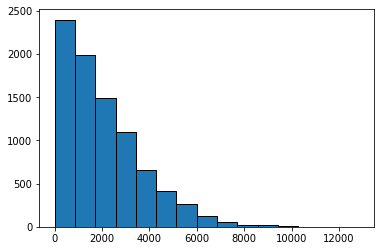

In [5]:
plt.hist(df['Profit'],bins=15,edgecolor='k');

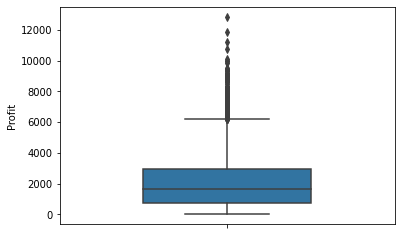

In [6]:
sns.boxplot(data=df,y=df['Profit'],width=0.5);


In [7]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


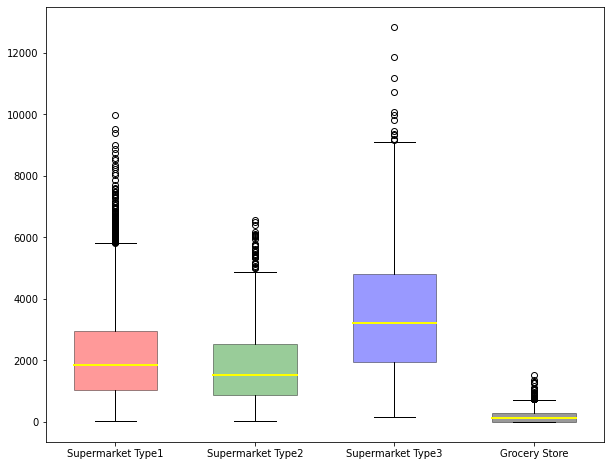

In [8]:
#Create boxplots for profit for each outlet type
plt.figure(figsize=(10,8))
sup1=df.loc[df['Outlet_Type']=='Supermarket Type1',:]['Profit']
sup2=df.loc[df['Outlet_Type']=='Supermarket Type2',:]['Profit']
sup3=df.loc[df['Outlet_Type']=='Supermarket Type3',:]['Profit']
gs=df.loc[df['Outlet_Type']=='Grocery Store',:]['Profit']
boxplots=plt.boxplot([sup1,sup2,sup3,gs],labels=['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store'],patch_artist=True,widths=.6,
            medianprops=dict(linestyle='-',linewidth=2,color='yellow'),
            boxprops = dict(linestyle='--',linewidth=1,color='black',facecolor='blue',alpha=0.4),
            )
;
box1=boxplots['boxes'][0]
box1.set_facecolor('red')
box2=boxplots['boxes'][1]
box2.set_facecolor('green')
box4=boxplots['boxes'][3]
box4.set_facecolor('black');

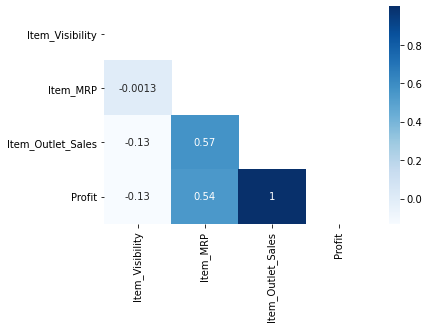

In [9]:
df_cor=df.loc[:,['Item_Visibility','Item_MRP','Item_Outlet_Sales','Profit']]
corr=df_cor.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap='Blues',annot=True,mask=mask);